# Predicción de Precios de Casas con Machine Learning

## ¿Qué vamos a hacer?
Vamos a crear un modelo que pueda predecir el precio de una casa basándose en sus características como:
- Metros cuadrados
- Número de habitaciones
- Número de baños
- Antigüedad de la casa

## Pasos que vamos a seguir:
1. **Cargar los datos** - Leer nuestro archivo CSV con información de casas
2. **Explorar los datos** - Ver qué información tenemos
3. **Preparar los datos** - Organizar la información para el modelo
4. **Entrenar el modelo** - Enseñar al modelo a predecir precios
5. **Hacer predicciones** - Usar el modelo para predecir precios nuevos
6. **Evaluar resultados** - Ver qué tan bien funciona nuestro modelo

In [ ]:
# Importamos las librerías necesarias
import pandas as pd          # Para trabajar con datos (como Excel pero mejor)
import numpy as np           # Para hacer cálculos matemáticos
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns        # Para crear gráficos más bonitos
from sklearn.model_selection import train_test_split  # Para dividir nuestros datos
from sklearn.linear_model import LinearRegression     # Nuestro modelo de machine learning
from sklearn.metrics import mean_squared_error, r2_score  # Para medir qué tan bien funciona

In [ ]:
df = pd.read_csv('datos_casas.csv')

print("Informacion sobre nuestros datos")
print(f"Numero de casas: {len(df)}")
print(f"Numero de caractertisticas: {len(df.columns)}")
print("Primeras 5 casas:")
df.head()

Informacion sobre nuestros datos
Numero de casas: 41
Numero de caractertisticas: 5
Primeras 5 casas:


,metros_cuadrados,habitaciones,banos,antiguedad,precio
0,120,3,2,5,250000
1,150,4,3,3,320000
2,90,2,1,8,180000
3,200,5,4,2,450000
4,110,3,2,6,220000


In [ ]:
print("Informacion estadistica basica:")
df.describe()

Informacion estadistica basica:


,metros_cuadrados,habitaciones,banos,antiguedad,precio
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,145.878049,3.536585,2.585366,5.170732,309024.390244
std,45.840591,1.097669,1.048227,3.239618,111815.805637
min,75.000000,2.000000,1.000000,0.000000,145000.000000
25%,110.000000,3.000000,2.000000,3.000000,215000.000000
50%,145.000000,3.000000,2.000000,5.000000,300000.000000
75%,180.000000,4.000000,3.000000,7.000000,380000.000000
max,240.000000,6.000000,5.000000,13.000000,550000.000000


In [ ]:
print("Hay datos faltantes o datos nulos?")
print(df.isnull().sum())


Hay datos faltantes o datos nulos?
metros_cuadrados    0
habitaciones        0
banos               0
antiguedad          0
precio              0
dtype: int64


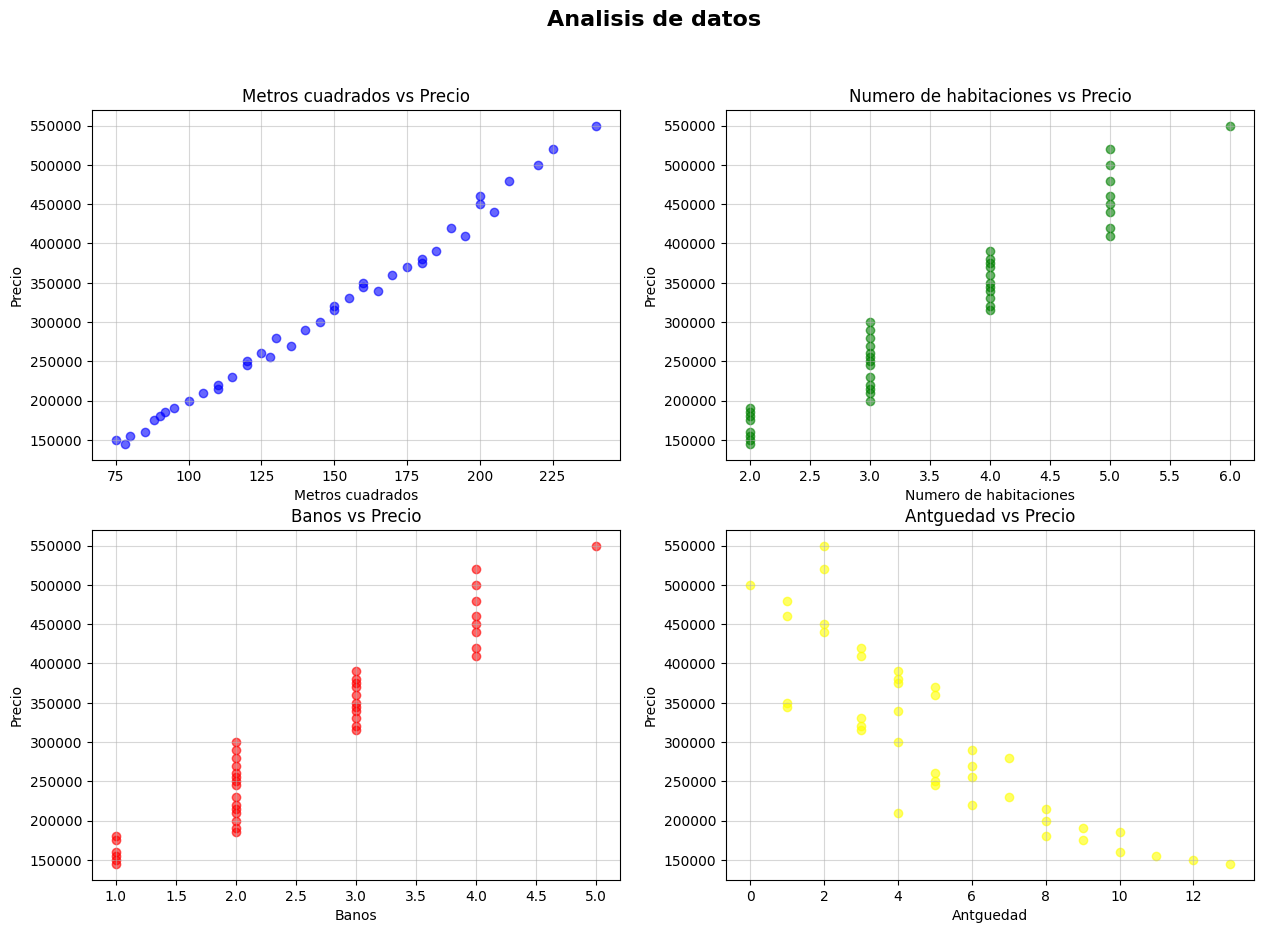

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle("Analisis de datos", fontsize=16, fontweight="bold")

axes[0,0].scatter(df['metros_cuadrados'], df['precio'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Metros cuadrados')
axes[0,0].set_ylabel('Precio')
axes[0,0].set_title('Metros cuadrados vs Precio')
axes[0,0].grid(True, alpha=0.5)

axes[0,1].scatter(df['habitaciones'], df['precio'], alpha=0.6, color='green')
axes[0,1].set_xlabel('Numero de habitaciones')
axes[0,1].set_ylabel('Precio')
axes[0,1].set_title('Numero de habitaciones vs Precio')
axes[0,1].grid(True, alpha=0.5)

axes[1,0].scatter(df['banos'], df['precio'], alpha=0.6, color='red')
axes[1,0].set_xlabel('Banos')
axes[1,0].set_ylabel('Precio')
axes[1,0].set_title('Banos vs Precio')
axes[1,0].grid(True, alpha=0.5)

axes[1,1].scatter(df['antiguedad'], df['precio'], alpha=0.6, color='yellow')
axes[1,1].set_xlabel('Antguedad')
axes[1,1].set_ylabel('Precio')
axes[1,1].set_title('Antguedad vs Precio')
axes[1,1].grid(True, alpha=0.5)

plt.show()



In [ ]:
X=df[['metros_cuadrados', 'habitaciones', 'banos', 'antiguedad']]
y=df['precio']

print("Caracteristicas que usaremos para predecir el precio:")
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Division de datos:")
print(f"Datos de entrernamiento: {X_train.shape[0]} casas")
print(f"Datos de prueba: {X_test.shape[0]} casas")

Caracteristicas que usaremos para predecir el precio:
Index(['metros_cuadrados', 'habitaciones', 'banos', 'antiguedad'], dtype='object')
Division de datos:
Datos de entrernamiento: 32 casas
Datos de prueba: 9 casas


In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Coeficientes:")
for i, col in enumerate(X.columns):
  print(f"{col}: {modelo.coef_[i]}")

print("Interpretaciones:")
print("Un coeficiente positivo significa que aumenta el precio")
print("Un coeficiente negativo significa que disminuye el precio")
print("Un numero mas grande significa mayor impacto")


Coeficientes:
metros_cuadrados: 2416.798387823806
habitaciones: -5776.3717224513675
banos: 6196.479906463123
antiguedad: -37.65830568317779
Interpretaciones:
Un coeficiente positivo significa que aumenta el precio
Un coeficiente negativo significa que disminuye el precio
Un numero mas grande significa mayor impacto


In [ ]:
predicciones = modelo.predict(X_test)

print("Predicciones vs precios reales:")
print("="*50)

comparacion=pd.DataFrame({
    'Precio real': y_test,
    'Prediccion': predicciones,
    'Diferencias': y_test - predicciones
})

print(comparacion.head(9).round(2))

Predicciones vs precios reales:
    Precio real  Prediccion  Diferencias
24       390000   403487.91    -13487.91
13       420000   416029.67      3970.33
8        280000   270030.92      9969.08
25       270000   282152.57    -12152.57
4        220000   221732.61     -1732.61
40       460000   440272.97     19727.03
19       260000   258022.24      1977.76
39       245000   245938.25      -938.25
29       300000   306395.87     -6395.87


In [ ]:
r2 = r2_score(y_test, predicciones)
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

print("Que significan los numeros:")
if r2>0.8:
  print("El modelo es muy bueno")
elif r2 > 0.6:
  print("El modelo bueno")
else:
  print("El modelo es malo")

R2: 0.98480584849631
MSE: 98067930.93986593
RMSE: 9902.9253728313
Que significan los numeros:
El modelo es muy bueno


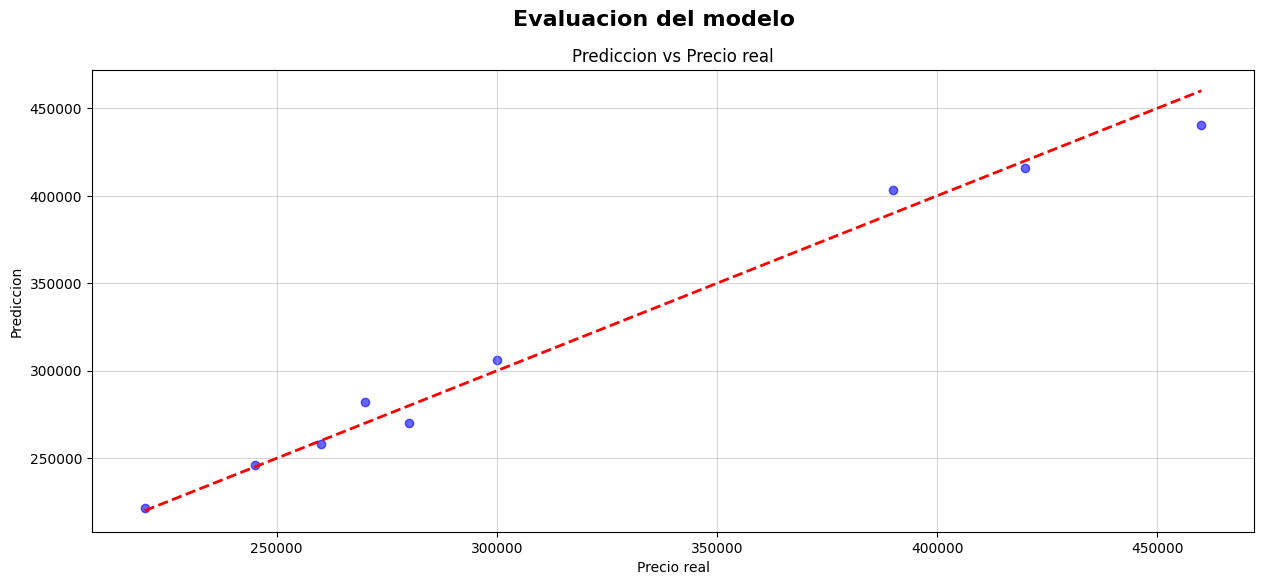

In [ ]:
fig, axes = plt.subplots(figsize=(15,6))
fig.suptitle("Evaluacion del modelo", fontsize=16, fontweight="bold")

axes.scatter(y_test, predicciones, alpha=0.6, color='blue')
axes.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
axes.set_xlabel('Precio real')
axes.set_ylabel('Prediccion')
axes.set_title('Prediccion vs Precio real')
axes.grid(True, alpha=0.5)

plt.show()

In [ ]:
print("Predicciones de casas nuevas:")
print("="*50)

casas_nuevas = [
  [100, 3, 2, 5],
  [180, 4, 3, 2],
  [250, 5, 4, 1],
  [80, 2, 1, 10],
  [300, 6, 5, 0],
]

caracteristicas = ['metros_cuadrados', 'habitaciones', 'banos', 'antiguedad']

for i, casa in enumerate(casas_nuevas, 1):
  precio_predicho = modelo.predict([casa])[0]
  for j, caracteristica in enumerate(caracteristicas):
    print(f"{caracteristica}: {casa[j]}")
  print(f"Precio predicho: ${precio_predicho:,.2f}")
  print("-"*50)


Predicciones de casas nuevas:
metros_cuadrados: 100
habitaciones: 3
banos: 2
antiguedad: 5
Precio predicho: $197,602.28
--------------------------------------------------
metros_cuadrados: 180
habitaciones: 4
banos: 3
antiguedad: 2
Precio predicho: $391,479.23
--------------------------------------------------
metros_cuadrados: 250
habitaciones: 5
banos: 4
antiguedad: 1
Precio predicho: $561,112.89
--------------------------------------------------
metros_cuadrados: 80
habitaciones: 2
banos: 1
antiguedad: 10
Precio predicho: $148,657.91
--------------------------------------------------
metros_cuadrados: 300
habitaciones: 6
banos: 5
antiguedad: 0
Precio predicho: $682,410.57
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
